# Set Cover

It is a problem "whose study has led to the development of fundamental techniques for the entire field" of approximation algorithms.

Given a set of elements {1,2,...,n} (called the universe) and a collection S of  m sets whose union equals the universe, the set cover problem is to identify the smallest sub-collection of S whose union equals the universe. For example, consider the universe  U={1,2,3,4,5} and the collection of sets  S={{1,2,3},{2,4},{3,4},{4,5}}. Clearly the union of  S is U. However, we can cover all of the elements with the following, smaller number of sets:  {{1,2,3},{4,5}}.

# Cost Function

We get the cost function from ()https://arxiv.org/abs/1302.5843 )。  
$H = H _ A + H _ B$  
$\displaystyle H _ { A }= A \sum _ { \alpha = 1 } ^ { n }\left( 1 - \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right) ^ { 2 }+ A \sum _ { \alpha = 1 } ^ { n } \left( \sum _ { m = 1 } ^ { N } m x _ { \alpha , m } - \sum _ { i : \alpha \in V_i } x_i \right) ^ { 2 }$  
$\displaystyle H_B = B \sum _ { i = 1 } ^ { N } x_i$  


# Creating QUBO
We have rules,
$x_{\alpha, m} = x_{\alpha, m} ^ 2$  
$x_i = x_i ^ 2$  

Now we can expand the equations 

$H _ { A }$  
$ \displaystyle
=A \sum _ { \alpha = 1 } ^ { n } \left\{
    -2 \left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right)
    +\left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } \right) ^ { 2 }
    +\left( \sum _ { m = 1 } ^ { N } mx _ { \alpha , m } \right) ^ { 2 }
    -2 \left( \sum _ { m = 1 } ^ { N } mx _ { \alpha , m } \right) \left( \sum _ { i : \alpha \in V _ { i } } x _ { i } \right)
    +\left( \sum _ { i : \alpha \in V _ { i } } x _ { i } \right) ^ 2 \right\}
$  

$ \displaystyle
= A \sum _ { \alpha = 1} ^ { n } \left\{
    \left( \sum _ { m = 1 } ^ { N } -2 x _ { \alpha , m } \right)
   +\left( \sum _ { m = 1 } ^ { N } x _ { \alpha , m } ^ 2 \right)
   +\left( \mathop { \sum \sum } _ { m \neq l } ^ { N } 2 x _ { \alpha , m } x _ { \alpha , l } \right)
   +\left( \sum _ { m = 1 } ^ { N } m ^ 2 x _ { \alpha , m } ^ 2 \right)
\right.
$  

$ \displaystyle
\quad \left.
   +\left( \mathop { \sum \sum } _ {m \neq l } ^ { N } 2ml x _ { \alpha , m } x _ { \alpha, l } \right)
   +\left( \sum _ { m = 1} ^ { N } \sum _ { i : \alpha \in V _ { i } } \left( -2m x _ { \alpha , m } x _ { i } \right) \right)
   +\left( \sum _ { i : \alpha \in V _ { i } } x _ { i } ^ 2 \right)
   +\left( \sum _ { i : \alpha \in V _ { i } } \sum _ { j : \alpha \in V _ { j }} 2 x _ { i } x _ { j }　\right) \right\}
$  

$ \displaystyle
= A \sum _ { \alpha = 1} ^ { n } \left\{
    \sum _ { m = 1 } ^ { N } \left( m ^ 2 - 1\right) x _ { \alpha , m } ^ 2
   +\mathop { \sum \sum } _ { m \neq l } ^ { N } 2 \left( 1 + ml \right) x _ { \alpha , m } x _ { \alpha , l }
   +\sum _ { m = 1} ^ { N } \sum _ { i : \alpha \in V _ { i } } \left( -2m \right) x _ { \alpha , m } x _ { i }
   +\sum _ { i : \alpha \in V _ { i } } x _ { i } ^ 2
   +\sum _ { i : \alpha \in V _ { i } } \sum _ { j : \alpha \in V _ { j }} 2 x _ { i } x _ { j } \right\}
$  

Let's start using blueqat.
Fisrt we need to install it.

```bash
pip install blueqat
```
And prepare for the libraries.

In [0]:
import numpy as np
import blueqat.wq as wq
import matplotlib.pyplot as plt

And next prepare the QUBO

In [0]:
def get_qubo(U, V, A, B):
    n = len(U)
    N = len(V)
    size = n * N + N
    qubo = np.zeros((size, size))
    
    # HA
    alpha_m_l = [(alpha, m, l) for alpha in range(n) for m in range(1, N + 1) for l in range(1, N + 1)]
    for alpha, m, l in alpha_m_l:
        u = alpha * N + m - 1
        v = alpha * N + l - 1
        if u == v:
            qubo[u][v] = m ** 2 - 1
        elif u < v:
            qubo[u][v] = 2 * (1 + m * l)
        
        i = m - 1
        j = l - 1
        v = n * N + j
        if U[alpha] in V[j]:
            qubo[u][v] = -2 * m

        u = n * N + i
        if U[alpha] in V[i] and U[alpha] in V[j]:
            if u == v:
                qubo[u][v] += 1
            elif u < v:
                qubo[u][v] += 2
    qubo *= A

    # HB
    for i in range(n * N, n * N + N):
        qubo[i][i] += B

    return qubo

And next we prepare some HA

In [0]:
def get_qubo_easy_to_understand_ver(U, V, A, B):
    n = len(U)
    N = len(V)
    size = n * N + N
    qubo = np.zeros((size, size))

    # HA
    for alpha in range(n): # x_(alpha, m) * x_(alpha, m)
        for m in range(1, N + 1):
            u = alpha * N + m - 1
            qubo[u][u] = m ** 2 - 1

    for alpha in range(n): # x_(alpha, m) * x_(alpha, l)
        for m in range(1, N + 1):
            for l in range(1, N + 1):
                u = alpha * N + m - 1
                v = alpha * N + l - 1
                if u >= v:
                    continue
                qubo[u][v] = 2 * (1 + m * l)

    for alpha in range(n): # x_(alpha, m) * x_(i)
        for m in range(1, N + 1):
            for i in range(N):
                u = alpha * N + m - 1
                v = n * N + i
                if U[alpha] in V[i]:
                    qubo[u][v] = -2 * m

    for i in range(N): # x_(i) * x_(i)
        u = n * N + i
        qubo[u][u] = len(V[i]) 

    for alpha in range(n): # x_(i) * x_(j)
        for i in range(N):
            for j in range(N):
                if i >= j:
                    continue
                u = n * N + i
                v = n * N + j
                if U[alpha] in V[i] and U[alpha] in V[j]:
                    qubo[u][v] += 2
    qubo *= A

    # HB
    for i in range(n * N, n * N + N):
        qubo[i][i] += B

    return qubo

Functions for showing results.

In [0]:
def show_answer(q, U, V):
    print(f"q = {q}")
    n = len(U)
    N = len(V)
    W = []
    for alpha in range(n):
        m_list = []
        for m in range(1, N + 1):
            if q[alpha  * N + m - 1] > 0:
                m_list.append(m)
        print(f"x_({alpha}, m) = {m_list}")
        if len(m_list) > 1:
            print(f"x_({alpha}, m) some m are 1")
        elif len(m_list) == 0:
            print(f"x_({alpha}, m) all m are 0")
    for i in range(N):
        if q[n * N + i] > 0:
            W.append(V[i])
    print("W =", W)

Now we have all the preparation and start solivng the cost function

2.76442813873291
q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [2]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0, 1, 2, 3], [2, 3, 4, 5]]


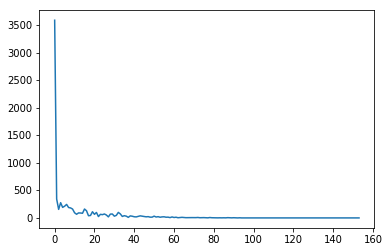

2.7520477771759033
q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [2]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0, 1, 2, 3], [2, 3, 4, 5]]


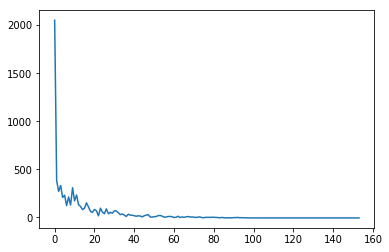

2.913097858428955
q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [2]
x_(3, m) = [2]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0, 1, 2, 3], [2, 3, 4, 5]]


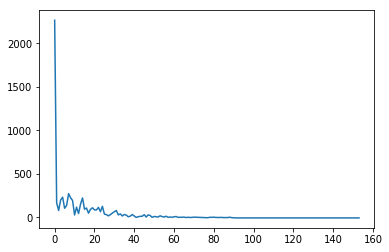

2.7761480808258057
q = [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
x_(0, m) = [1]
x_(1, m) = [1]
x_(2, m) = [1]
x_(3, m) = [1]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[4], [5], [0, 1, 2, 3]]


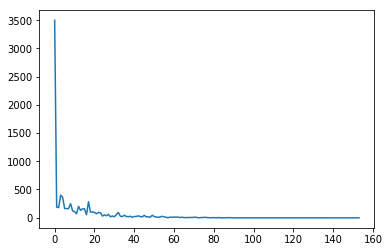

2.856117010116577
q = [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
x_(0, m) = [2]
x_(1, m) = [1]
x_(2, m) = [1]
x_(3, m) = [1]
x_(4, m) = [1]
x_(5, m) = [1]
W = [[0], [4], [5], [0, 1, 2, 3]]


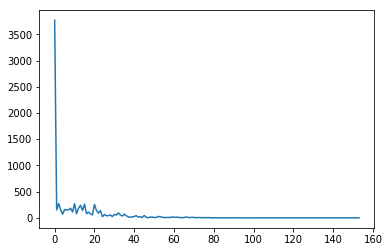

In [0]:
# examples
U = [0,1,2,3,4,5]
V = [[0],[1],[2],[3],[4],[5],[0,1,2,3],[2,3,4,5]]

# parameters for QUBO
A = 1.2
B = 1

annealer = wq.Opt()
annealer.qubo = get_qubo(U, V, A, B)
annealer.Ts *= 10 #Adjustingt the parameter of Temperature of algorithm
for _ in range(5):
    q = annealer.sa()
    show_answer(q, U, V)
    plt.plot(annealer.E)
    plt.show()

Now we have 3 correct answer among 5 trials